## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from model_classes import HealthModel
import torch
from datetime import datetime as dt

## Config

Linear regressor config:

In [246]:
config = {
    "architecture": "linear_regressor",
    "train_size": 0.8,
    "val_size": False, # Set MLP 
    "hidden_layer_sizes": False, # configs
    "batch_size": False, # to False
    "num_epochs": False, # if using
    "learning_rate": False, # linear regressor
    "spatial_resolution": "regional",
    "temporal_resolution": "daily",
    "input_artifacts": ["laqn-regional", "met-resample", "income-regional"],
    "laqn_variables": ["NO2", "PM10"], # Set to False if excluding air pollutants
    "met_variables": ["temperature", "humidity", "dew_point", "wind_speed", "pressure"], # "wind_dir"# Set to False if excluding meteorology
    "income_variables": ["gross_disposable_income", "property_income_received", #"property_income_paid", 
                         "social_benefits_received", "current_taxes_on_wealth"], # Set to False if excluding income
    "ablation_features": False, #["temperature"] # Set to False if not analysing feature importance
    "target_shift": 1, # Time lag end point for target variable
    "window_size": 20 # Input window size
    }

MLP regressor config:

In [16]:
config = {
    "architecture": "MLP_regressor",
    "train_size": 0.7,
    "val_size": 0.15, # Set MLP configs
    "hidden_layer_size": 10,
    "num_layers": 1,
    "batch_size": 30, # to False
    "num_epochs": 100, # if using
    "learning_rate": 0.001, # linear regressor
    "spatial_resolution": "regional",
    "temporal_resolution": "daily",
    "input_artifacts": ["laqn-regional", "met-resample", "income-regional"],
    "laqn_variables": ["NO2", "PM10"], # Set to False if excluding air pollutants
    "met_variables": ["temperature", "humidity", "dew_point", "wind_speed", "pressure"], # "wind_dir" # Set to False if excluding meteorology
    "income_variables": ["gross_disposable_income", "property_income_received", "social_benefits_received", "current_taxes_on_wealth"], # Set to False if excluding income
    "ablation_features": ["PM10"], # Set to False if not analysing feature importance
    "target_shift": 1, # Time lag for target variable
    "window_size": 1 # Input window size
    }

torch.manual_seed(1)

LSTM regressor config:

In [325]:
config = {
    "architecture": "LSTM_regressor",
    "train_size": 0.7,
    "val_size": 0.15, 
    "hidden_layer_size": 10,
    "num_layers": 1,
    "batch_size": 30, 
    "num_epochs": 100, 
    "learning_rate": 0.001, 
    "spatial_resolution": "regional",
    "temporal_resolution": "daily",
    "input_artifacts": ["laqn-regional", "met-resample", "income-regional"],
    "laqn_variables": ["NO2", "PM10"], # Set to False if excluding air pollutants
    "met_variables": ["temperature", "humidity", "dew_point", "wind_speed", "pressure"], # "wind_dir" # Set to False if excluding meteorology
    "income_variables": ["gross_disposable_income", "property_income_received", "social_benefits_received", "current_taxes_on_wealth"], # Set to False if excluding income
    "ablation_features": ["gross_disposable_income", "property_income_received", "social_benefits_received", "current_taxes_on_wealth"], # Set to False if not analysing feature importance
    "target_shift": 1, # Time lag for target variable
    "window_size": 14 # Input window size
    }

torch.manual_seed(1)

In [23]:
if not config["ablation_features"]:
    plot_title_model = f"(all inputs, time lag {config['target_shift']} window {config['window_size']})"
else:
    plot_title_model = f"(scrambled {', '.join(config['ablation_features'])}, time lag {config['target_shift']} window {config['window_size']})"

## Code

In [17]:
model = HealthModel(config)

In [18]:
inputs, targets, datetime = model.preprocess_and_log()

laqn-regional


wandb:   6 of 6 files downloaded.  


met-resample


wandb:   8 of 8 files downloaded.  


income-regional


wandb:   51 of 51 files downloaded.  


input columns:  Index(['NO2_mean', 'NO2_min', 'NO2_max', 'PM10_mean', 'PM10_max', 'PM10_min',
       'temperature_mean', 'temperature_min', 'temperature_max',
       'humidity_mean', 'humidity_min', 'humidity_max', 'dew_point_mean',
       'dew_point_min', 'dew_point_max', 'wind_speed_mean', 'wind_speed_min',
       'wind_speed_max', 'pressure_mean', 'pressure_min', 'pressure_max',
       'gross_disposable_income_min', 'gross_disposable_income_median',
       'gross_disposable_income_max', 'property_income_received_max',
       'property_income_received_median', 'property_income_received_min',
       'social_benefits_received_median', 'social_benefits_received_max',
       'social_benefits_received_min', 'current_taxes_on_wealth_median',
       'current_taxes_on_wealth_max', 'current_taxes_on_wealth_min'],
      dtype='object')
Ablation - scrambled columns: ['PM10_mean', 'PM10_max', 'PM10_min']


wandb:   1 of 1 files downloaded.  



 train
inputs (5363, 33)
targets (5363,)
datetime index (5363,)
Processing time lagged (1) input windows (length 1)
inputs (before flattening) (5362, 1, 33)
targets (before flattening) (5362, 1)
datetime index (5362,)

 val
inputs (1149, 33)
targets (1149,)
datetime index (1149,)
Processing time lagged (1) input windows (length 1)
inputs (before flattening) (1148, 1, 33)
targets (before flattening) (1148, 1)
datetime index (1148,)

 test
inputs (1150, 33)
targets (1150,)
datetime index (1150,)
Processing time lagged (1) input windows (length 1)
inputs (before flattening) (1149, 1, 33)
targets (before flattening) (1149, 1)
datetime index (1149,)


In [6]:
# print("window_size: ", config["window_size"])
# model.create_baseline()

In [7]:
# model.train_and_log()

MLP-regressor


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


x_train shape (5362, 1, 33)
hidden layer sizes [33, 10]


100%|██████████| 100/100 [00:18<00:00,  5.40it/s]


best_epoch,▁
best_mean_absolute_percentage_error_train,▁
best_mean_absolute_percentage_error_val,▁
best_mean_squared_error_train,▁
best_mean_squared_error_val,▁
best_r_squared_train,▁
best_r_squared_val,▁
best_rmse_train,▁
best_rmse_val,▁
best_smape_train,▁
best_smape_val,▁


In [19]:
print(config["architecture"])
print("window_size: ", config["window_size"])
data_dict = model.test_and_log()

MLP_regressor
window_size:  1


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


mean_absolute_percentage_error_test,▁
mean_squared_error_test,▁
r2_test,▁
rmse_test,▁
smape_test,▁
mean_absolute_percentage_error_test,11.85448
mean_squared_error_test,0.04704
r2_test,0.18124
rmse_test,0.21688
smape_test,11.2546


#### Alternative
If the model has already been run, lookup the test_and_log output artifact version on the wandb web interface and read it in here:

In [20]:
#data_dict = model.read_data("xy_all", "v2") 

## Plot results

In [24]:
df = pd.DataFrame()
subsets = ["train", "val", "test"] if config["val_size"] else ["train", "test"]
for subset in subsets:
    subset_df = pd.DataFrame(index=pd.DatetimeIndex(data_dict[f"{subset}_dates"]), data={"observed":data_dict[f"y_{subset}"].flatten(), "predicted":data_dict[f"y_{subset}_predict"].flatten()})
    df = subset_df.copy() if df.empty else df.append(subset_df)

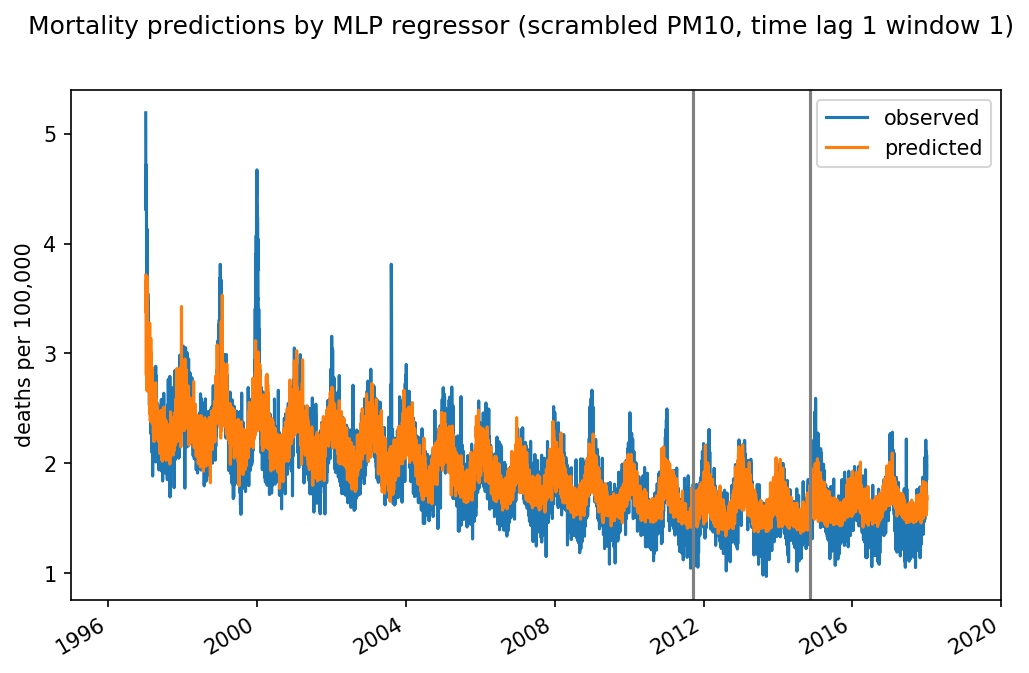

In [25]:
plt.figure(figsize=(8,5), dpi=150)
df["observed"].plot()
df["predicted"].plot()
plt.axvline(data_dict["train_dates"].max(), color="grey")
plt.axvline(data_dict["val_dates"].max(), color="grey") if config["val_size"] else None
plt.legend()
plt.ylabel("deaths per 100,000")
plt.xlim(dt(year=1995, month=1, day=1), dt(year=2020, month=1, day=1))
regressor_title = config["architecture"].replace("_", " ")
plt.suptitle(f"Mortality predictions by {regressor_title} {plot_title_model}")
plt.show()

## Visualisation of ablation results

In [ ]:
import json        

# Define the categories for the ablation features
def categorise_feature(features):
    # Define feature categories
    pollution_features = set(["NO2", "PM10"])
    meteorological_features = set(["temperature", "humidity", "dew_point", "wind_speed", "pressure"])
    environmental_features = set(["NO2", "PM10", "temperature", "humidity", "dew_point", "wind_speed", "pressure"])
    socioeconomic_features = set(["gross_disposable_income", "property_income_received", "social_benefits_received", "current_taxes_on_wealth"])
    
    # Convert the JSON string to a Python list
    features = json.loads(features)
    feature_set = set(features)
    
    # Categorize based on feature sets
    if feature_set == pollution_features:
        return "all pollution"
    elif feature_set == meteorological_features:
        return "all meteorology"
    elif feature_set == environmental_features:
        return "all environmental"
    elif feature_set == socioeconomic_features:
        return "all socioeconomics"
    else:
        return features[0].replace("_", " ")

In [299]:
window_size = 21
# top = 5
sort_by = "LSTM"

In [300]:
ablation_df = pd.read_csv(f"regional_ablation_results/window_size_{window_size}.csv")
df = ablation_df[["architecture", "window_size", "ablation_features", "smape_test"]]

# Get baseline SMAPE values for each architecture
baseline_df = df[df['ablation_features'] == 'false'].set_index('architecture')['smape_test']
# Calculate the difference from the baseline
df = df[df['ablation_features'] != 'false']
df['smape_diff'] = df.apply(lambda row: row['smape_test'] - baseline_df[row['architecture']], axis=1)
# Pivot the DataFrame to get the desired format
pivot_df = df.pivot_table(index=['ablation_features'], columns='architecture', values='smape_diff', aggfunc='first')
# Reset index to make 'ablation_features' a column again
df = pivot_df.reset_index()

# Apply categorization to the 'ablation_features' column
df['feature_category'] = df['ablation_features'].apply(categorise_feature)
# Filter dataframe by string (optional)
df = df[~df["feature_category"].str.contains("all")]
# Sort values
df = df.sort_values(by=f'{sort_by}_regressor', ascending=True)#.tail(top)

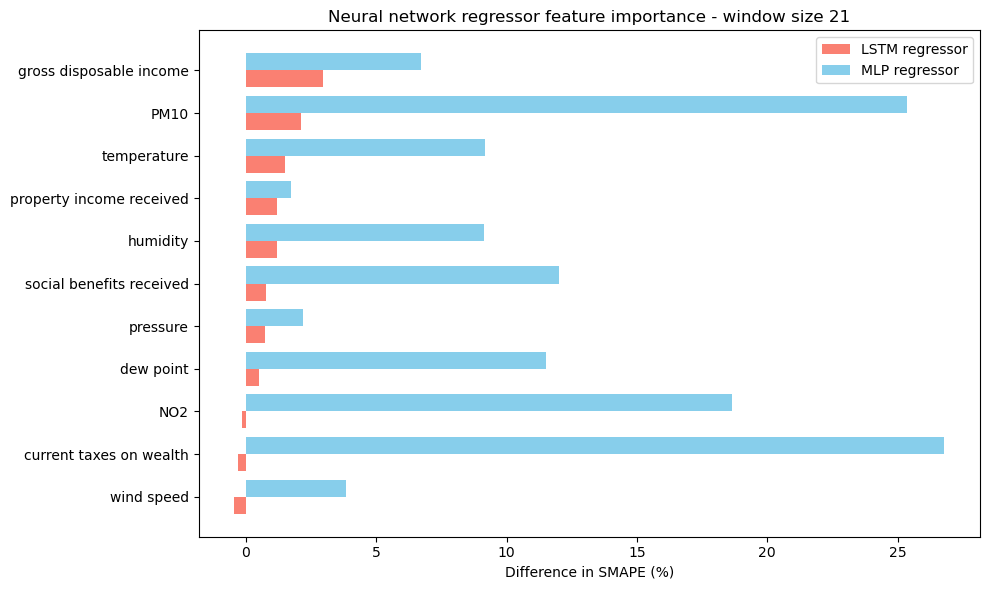

In [301]:
# Plot horizontal bar chart with both LSTM and MLP regressor values

plt.figure(figsize=(10, 6))

# Bar width for the grouped bars
bar_width = 0.4
index = range(len(df))

# Plot bars for both LSTM and MLP regressors
plt.barh([i - bar_width / 2 for i in index], df['LSTM_regressor'], bar_width, label='LSTM regressor', color='salmon')
plt.barh([i + bar_width / 2 for i in index], df['MLP_regressor'], bar_width, label='MLP regressor', color='skyblue')

# Adding labels, title, and legend
plt.yticks(index, df['feature_category'])
plt.xlabel('Difference in SMAPE (%)')
# plt.title(f'Neural network regressor feature importance (top {top} by {sort_by}) - window size {window_size}')
plt.title(f'Neural network regressor feature importance - window size {window_size}')
plt.legend()

plt.tight_layout()

filename = "MLP_LSTM_features.pdf"
plt.savefig(f"figures/window_{window_size}/{filename}")
plt.show()


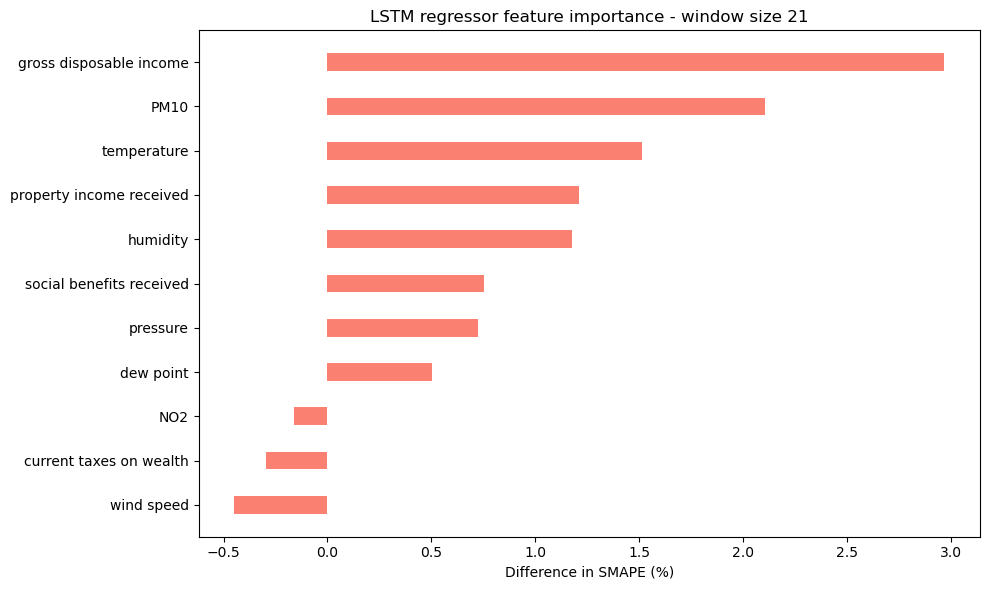

In [302]:
# Plot horizontal bar chart with single regressor model
colour_dict = {"MLP": "skyblue", "LSTM": "salmon"}
plt.figure(figsize=(10, 6))

# Bar width for the grouped bars
bar_width = 0.4
index = range(len(df))

# Plot bars for both regressor
plt.barh([i for i in index], df[f'{sort_by}_regressor'], bar_width, label=f'{sort_by} regressor', color=colour_dict[sort_by])

# Adding labels, title
plt.yticks(index, df['feature_category'])
plt.xlabel('Difference in SMAPE (%)')
# plt.title(f'{sort_by} regressor feature importance (top {top}) - window size {window_size}')
plt.title(f'{sort_by} regressor feature importance - window size {window_size}')
plt.tight_layout()

filename = f"{sort_by}_features.pdf"
plt.savefig(f"figures/window_{window_size}/{filename}")
plt.show()


# Visualisation of window length sweeps

In [39]:
from scipy.signal import savgol_filter

models = {
    "MLP": "sweep_vsumpyeb-MLP_window_sizes",
    "LSTM": "sweep_yz4gmnjx-LSTM_window_sizes"
}

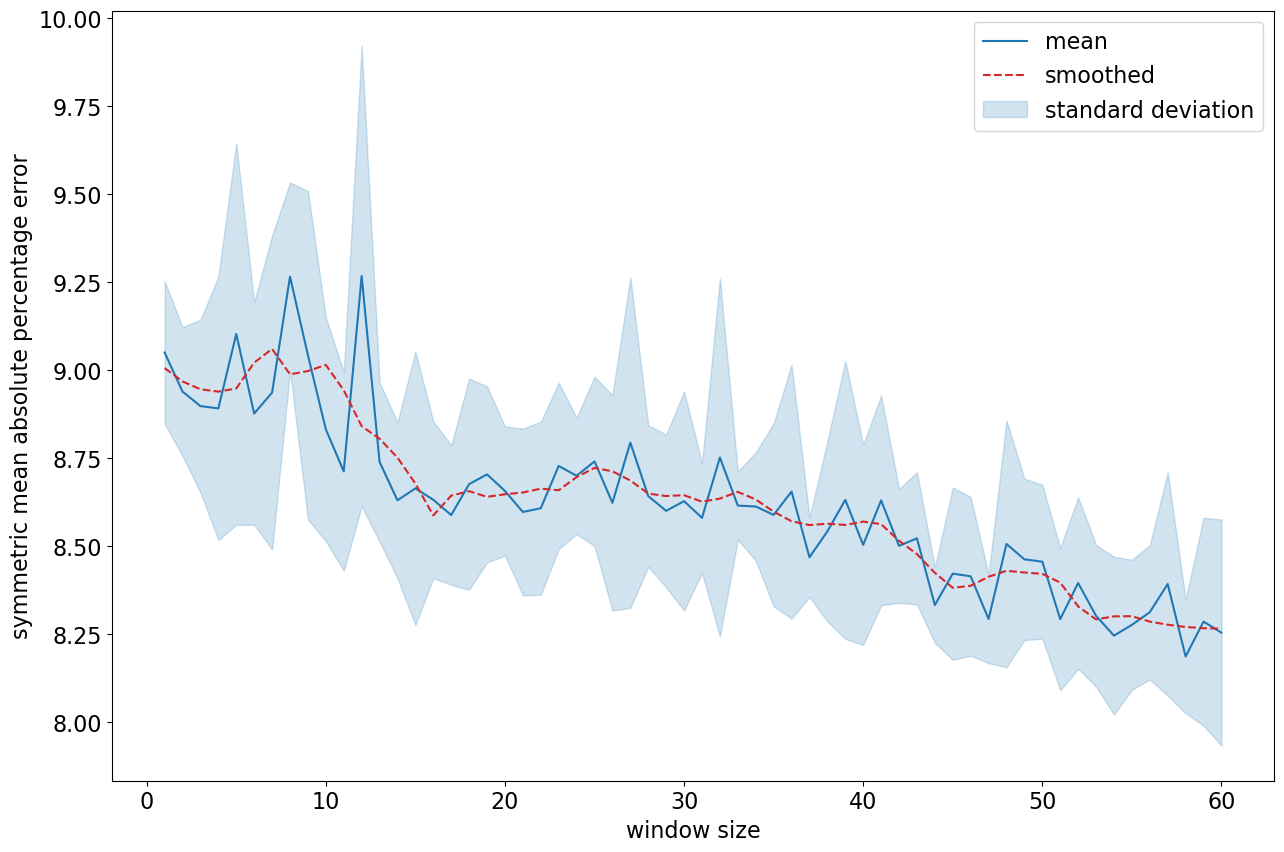

In [45]:
model = "LSTM"

df = pd.read_csv(f"results/{models[model]}.csv")
grouped = df.groupby("window_size")["smape_test"].agg(["mean", "std"]).reset_index()
smoothed_mean = savgol_filter(grouped['mean'], window_length=9, polyorder=2)  # Adjust window_length for more/less smoothing

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(15, 10))
plt.plot(grouped['window_size'], grouped['mean'], label="mean", color="tab:blue")
plt.plot(grouped['window_size'], smoothed_mean, label='smoothed', color='tab:red', linestyle='--')
plt.fill_between(
    grouped['window_size'], 
    grouped['mean'] - grouped['std'], 
    grouped['mean'] + grouped['std'],
    color='tab:blue',
    alpha=0.2,
    label='standard deviation'
)
plt.xlabel('window size (days)')
plt.ylabel('symmetric mean absolute percentage error (%)')
plt.legend()

plt.savefig(f"results/{models[model]}.png")
plt.show()